In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns
%matplotlib inline

# Build dataframe with data for plotting
http://koaning.io/radial-basis-functions.html

$\phi_{i} (x) = exp\left( \frac{-1}{2 \alpha} (x-m_i)^2 \right)$

In [35]:
def rbf(x, alpha, m):
    return np.exp(-1/(2*alpha)*(x-m)**2)

In [36]:
# Generate data with rbf
x = np.arange(-2, 5, 0.01)
df=pd.DataFrame(data=x, columns=['x']).set_index('x')
## make 5 radial functions, with different m 
for i in range(5):
    df[str(i)] = rbf(x,.25,i)
df.rename_axis('m', axis='columns', inplace = True)
df.head()

m,0,1,2,3,4
x,,,,,
-2.00,0.000335,1.522998e-08,1.266417e-14,1.928750e-22,5.380186e-32
-1.99,0.000363,1.716832e-08,1.485856e-14,2.355309e-22,6.838189e-32
-1.98,0.000393,1.934562e-08,1.742623e-14,2.875056e-22,8.687828e-32
-1.97,0.000426,2.179032e-08,2.042943e-14,3.508091e-22,1.103336e-31
-1.96,0.000460,2.453415e-08,2.394062e-14,4.278798e-22,1.400652e-31


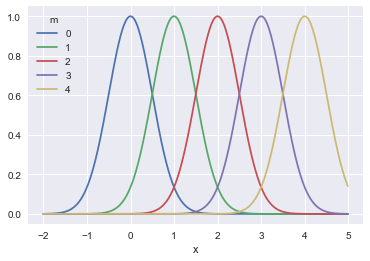

In [37]:
df.plot();

# Example: pattern learning with rbf and linear regression
Assuming $\alpha=1$, then 

$\phi_{i} (x) = exp\left( \frac{-1}{2} (x-m_i)^2 \right)$

## Generate monthly data

In [38]:
# Generate rbf
x = np.arange(0, 12, 0.01)
df=pd.DataFrame(data=x, columns=['x'])
df['y'] = np.sin(x) + 2*np.cos(x/2) + np.random.normal(loc=0.0, scale=.2, size=len(df))
df.head()

,x,y
0,0.00,1.967247
1,0.01,1.938745
2,0.02,1.387626
3,0.03,1.829816
4,0.04,1.751665


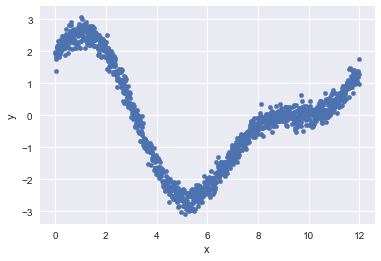

In [39]:
df.plot(kind='scatter', x='x', y='y');

## With $\alpha =1$ add a radial function for each month 

In [40]:
for i in range(1,13):
    df[str(i)] = rbf(df['x'],1,i)

In [41]:
df.head()

,x,y,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,1.967247,0.606531,0.135335,0.011109,0.000335,0.000004,1.522998e-08,2.289735e-11,1.266417e-14,2.576757e-18,1.928750e-22,5.311092e-27,5.380186e-32
1,0.01,1.938745,0.612596,0.138062,0.011447,0.000349,0.000004,1.617094e-08,2.455637e-11,1.371824e-14,2.819280e-18,2.131492e-22,5.928359e-27,6.065840e-32
2,0.02,1.387626,0.618660,0.140830,0.011794,0.000363,0.000004,1.716832e-08,2.633295e-11,1.485856e-14,3.084321e-18,2.355309e-22,6.616705e-27,6.838189e-32
3,0.03,1.829816,0.624721,0.143639,0.012150,0.000378,0.000004,1.822539e-08,2.823525e-11,1.609207e-14,3.373942e-18,2.602369e-22,7.384236e-27,7.708110e-32
4,0.04,1.751665,0.630779,0.146490,0.012515,0.000393,0.000005,1.934562e-08,3.027194e-11,1.742623e-14,3.690388e-18,2.875056e-22,8.239977e-27,8.687828e-32


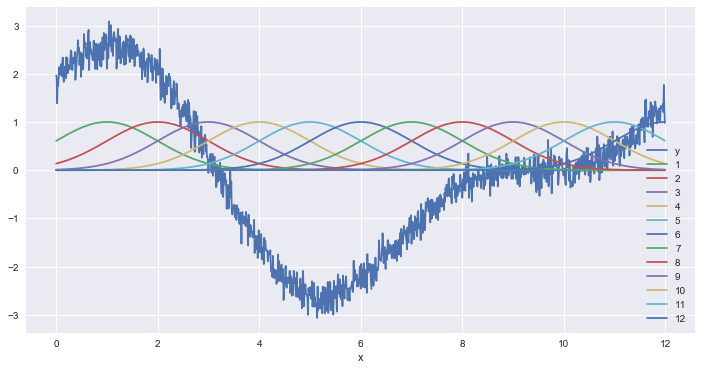

In [42]:
df.set_index('x').plot(figsize=(12,6));

## Plot two different fits: one with floor and the other with rbf

In [104]:
dfz =pd.DataFrame()
for i in range(1,13):
    dfz[i]=np.floor(df['x'])

# Forecasting bridge data with rbf linear regression 

In [110]:
# lin reg with z model 
X = dfz
Y=df['y']
model = sm.OLS( Y, X ).fit()
df['model_z'] = model.predict(X)
model.summary()

/Users/cristian/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     49.17
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.92e-12
Time:                        18:25:03   Log-Likelihood:                -2232.2
No. Observations:                1200   AIC:                             4466.
Df Residuals:                    1199   BIC:                             4471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
2             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
3             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
4             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
5             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
6             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
7             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
8             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
9             -0.0040      0.001     -7.012      0.000      -0.005      -0.003
10            -0.0040      0.001     -7.012      0.000      -0.005      -0.003
11            -0.0040      0.001     -7.012      0.000      -0.005      -0.003
12            -0.0040      0.001     -7.012      0.000      -0.005      -0.003
==============================================================================
Omnibus:                      264.195   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.293
Skew:                          -0.126   Prob(JB):                     2.68e-12
Kurtosis:                       1.999   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
df.columns

Index(['x', 'y', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       'z', 'model_z', 'model_rbf'],
      dtype='object')

In [112]:
#lin reg with rbf
X = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']]
Y=df['y']
model = sm.OLS( Y, X ).fit()
df['model_rbf'] = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5886.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        18:25:38   Log-Likelihood:                 204.81
No. Observations:                1200   AIC:                            -385.6
Df Residuals:                    1188   BIC:                            -324.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              2.7039      0.050     54.581      0.000       2.607       2.801
2             -0.2682      0.104     -2.578      0.010      -0.472      -0.064
3              1.3015      0.148      8.781      0.000       1.011       1.592
4             -1.6767      0.179     -9.350      0.000      -2.029      -1.325
5             -0.8710      0.200     -4.363      0.000      -1.263      -0.479
6             -1.3487      0.212     -6.360      0.000      -1.765      -0.933
7             -0.3534      0.219     -1.615      0.107      -0.783       0.076
8              0.2115      0.221      0.957      0.339      -0.222       0.645
9             -0.2968      0.218     -1.360      0.174      -0.725       0.131
10             0.5447      0.208      2.624      0.009       0.137       0.952
11            -1.0090      0.180     -5.597      0.000      -1.363      -0.655
12             1.8110      0.117     15.539      0.000       1.582       2.040
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.561
Skew:                          -0.061   Prob(JB):                        0.458
Kurtosis:                       2.873   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

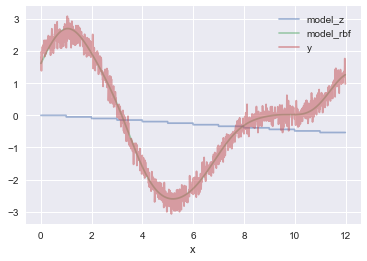

In [113]:
df[['model_z','x', 'model_rbf','y']].plot(x='x', alpha=.5);

# Testing linear regression methods and results

In [33]:
import statsmodels.formula.api as sm

In [34]:
x = np.arange(-1, 1.1, .1)
df = pd.DataFrame(data=x, columns=['x'])
df['intercept'] =np.ones(len(df))
df['y'] = 2*df['x']+3+ np.random.normal(loc=0.0, scale=.2, size=len(df)) 
df.head()

,x,intercept,y
0,-1.0,1.0,0.885139
1,-0.9,1.0,1.058364
2,-0.8,1.0,1.111030
3,-0.7,1.0,1.707536
4,-0.6,1.0,1.993295


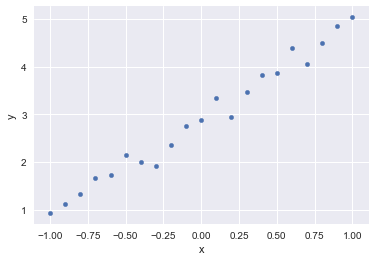

In [279]:
df.plot(kind='scatter', x='x',y='y');

/Users/cristian/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


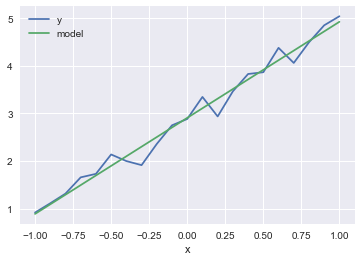

In [281]:
df.plot( x='x', y=['y','model']);

## add more independent variables

In [282]:
x = np.arange(-1, 1.1, .1)
df = pd.DataFrame(data=x, columns=['x'])
df['intercept'] =np.ones(len(df))
df['cos'] = 2*np.cos(df['x'])
df['y'] = 2*df['x']+3 + df['cos'] + np.random.normal(loc=0.0, scale=.2, size=len(df))
df.head()

,x,intercept,cos,y
0,-1.0,1.0,1.080605,1.630409
1,-0.9,1.0,1.243220,2.728106
2,-0.8,1.0,1.393413,2.707396
3,-0.7,1.0,1.529684,3.020428
4,-0.6,1.0,1.650671,3.512347


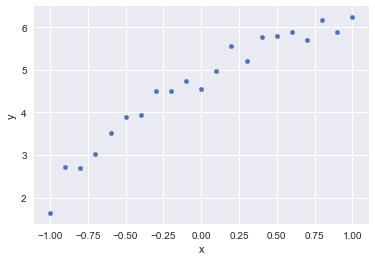

In [283]:
df.plot(kind='scatter', x='x',y='y');

In [284]:
X = df[['x', 'intercept', 'cos']]
Y = df['y']
model = sm.OLS( Y, X ).fit()
df['model'] = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     343.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.56e-15
Time:                        16:28:41   Log-Likelihood:                 3.5169
No. Observations:                  21   AIC:                            -1.034
Df Residuals:                      18   BIC:                             2.100
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.0329      0.080     25.518      0.000       1.865       2.200
intercept      3.0187      0.268     11.254      0.000       2.455       3.582
cos            0.9665      0.160      6.055      0.000       0.631       1.302
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   2.530
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.016
Skew:                          -0.419   Prob(JB):                        0.602
Kurtosis:                       2.322   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

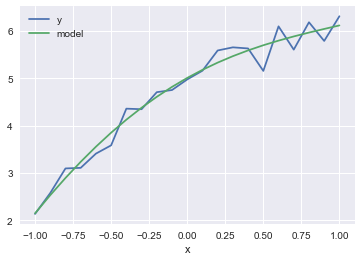

In [318]:
df[ ['x', 'y','model' ] ].plot( x="x");

## add non-contributing column 

In [309]:
x = np.arange(-1, 1.1, .1)
df = pd.DataFrame(data=x, columns=['x'])
df['intercept'] =np.ones(len(df))
df['cos'] = 2*np.cos(df['x'])
df['sin'] =  2*np.sin(df['x'])
df['y'] = 2*df['x']+3 + df['cos'] + np.random.normal(loc=0.0, scale=.2, size=len(df))
df.head()

,x,intercept,cos,sin,y
0,-1.0,1.0,1.080605,-1.682942,2.135667
1,-0.9,1.0,1.243220,-1.566654,2.577563
2,-0.8,1.0,1.393413,-1.434712,3.096890
3,-0.7,1.0,1.529684,-1.288435,3.109143
4,-0.6,1.0,1.650671,-1.129285,3.409609


In [310]:
X = df[['x', 'intercept', 'cos', 'sin']]
Y = df['y']
model = sm.OLS( Y, X ).fit()
df['model'] = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.91e-13
Time:                        17:38:03   Log-Likelihood:                 2.8531
No. Observations:                  21   AIC:                             2.294
Df Residuals:                      17   BIC:                             6.472
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.9755      1.698      1.752      0.098      -0.607       6.558
intercept      3.1031      0.285     10.893      0.000       2.502       3.704
cos            0.9532      0.170      5.623      0.000       0.596       1.311
sin           -0.5883      0.948     -0.621      0.543      -2.588       1.412
==============================================================================
Omnibus:                        2.464   Durbin-Watson:                   2.856
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.553
Skew:                          -0.666   Prob(JB):                        0.460
Kurtosis:                       2.983   Cond. No.                         74.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

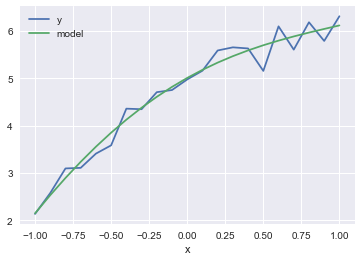

In [317]:
df[ ['x', 'y','model' ] ].plot( x="x");